In [120]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np

# 1. Carregar as imagens postadas no AVA em conjunto com esta atividade. 

In [51]:
baboo = cv2.imread('baboo_colorido.tif')
jupiter = cv2.imread('jupiter.tif')
lena = cv2.imread('lena_colorida.tif')

# 2. Separe as componentes de cor das imagens: R, G e B. 

In [25]:
baboo_r, baboo_g, baboo_b = cv2.split(baboo)
jupiter_r, jupiter_g, jupiter_b = cv2.split(jupiter)
lena_r, lena_g, lena_b = cv2.split(lena)

# 3. Converta estas imagens para o modelo CMY, separe suas componentes.


In [30]:
def rgb_to_cmy(r, g, b):
    
    # função para tranformar rgb para cmy
    
    c = 255 - r
    m = 255 - g
    y = 255 - b
    
    return (c, m, y)

In [31]:
baboo_c, baboo_m, baboo_y = rgb_to_cmy(baboo_r, baboo_g, baboo_b)
jupiter_c, jupiter_m, jupiter_y = rgb_to_cmy(jupiter_r, jupiter_g, jupiter_b)
lena_c, lena_m, lena_y = rgb_to_cmy(lena_r, lena_g, lena_b)

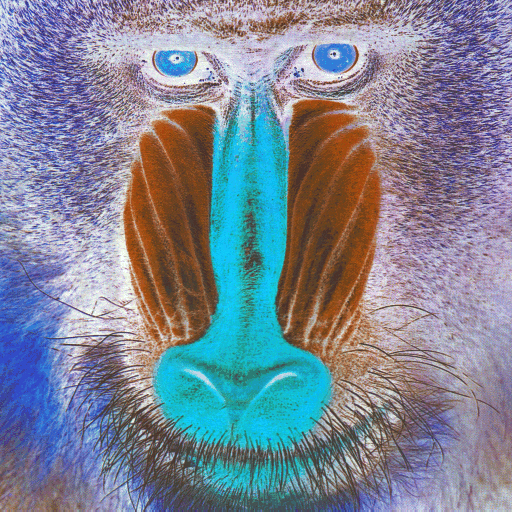

In [37]:
# EXEMPLO DE IMAGEM EM CMY, JUNTRANDO OS COMPONENTES RETORNADOS PELA FUNÇÃO rgb_to_csv
baboo_cmy = cv2.merge((baboo_c, baboo_m, baboo_y))
cv2_imshow(baboo_cmy)

# 4. Converta as imagens para HSI, usando o comando cvtColor. Veja cada uma das
componentes deste modelo: 1: Intensidade, 2: Saturação, 3: Matiz. O que cada uma
destas componentes significa?


In [55]:
baboo_hsi = cv2.cvtColor(baboo, cv2.COLOR_BGR2HSV)
jupiter_hsi = cv2.cvtColor(jupiter, cv2.COLOR_BGR2HSV)
lena_hsi = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)

A saturação pode ser entendida como a quantidade de branco que temos na cor.
A intensidade torna a cor mais clara ou mais escura,
Os níveis de cinza ficam no eixo do cilindro.

# 5. Separe apenas uma componente de cor diferente de cada imagem, só a vermelha, só a verde e só a azul. Mostre os resultados. 


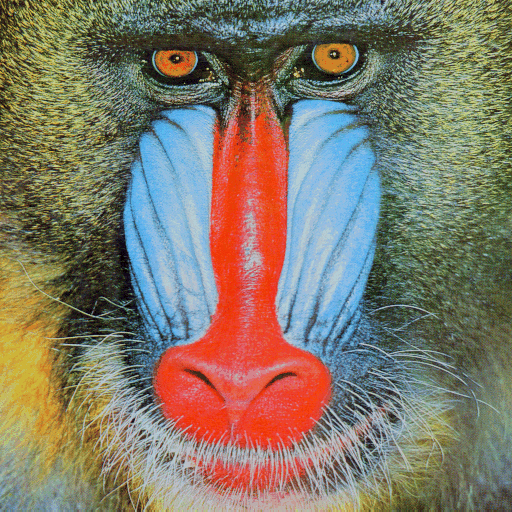

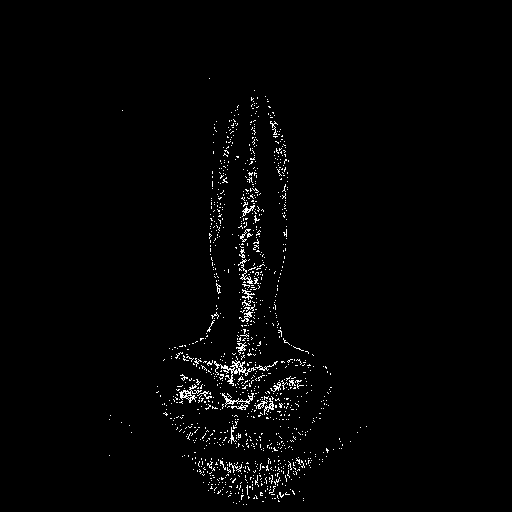

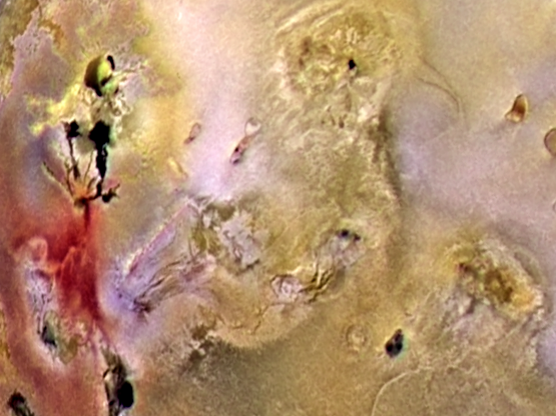

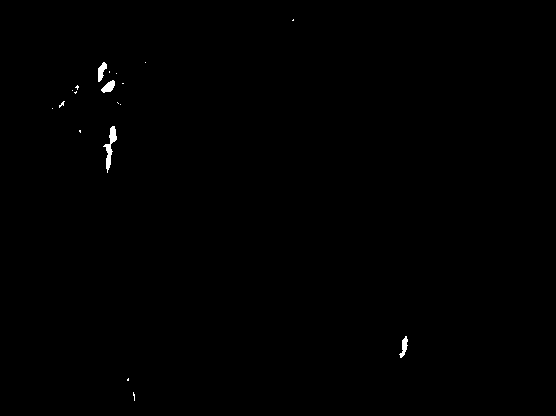

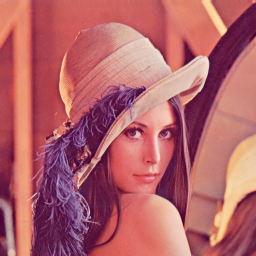

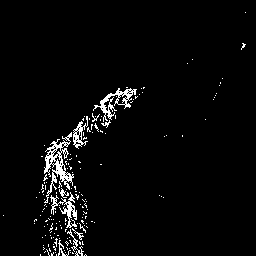

In [111]:
# para esse exercicio foi dado as seguintes informações

# cor limite infirior limite superior

# azul [(120, 100, 120), (230, 255, 255)]

# verde [(30, 20, 80), (130, 255, 255)]

# vermelho [(100, 100, 100), (160, 255, 255)] 

vermelho = [(120, 100, 120), (230, 255, 255)]

verde = [(30, 20, 80), (130, 255, 255)]

azul = [(100, 100, 100), (160, 255, 255)] 

# a primeira posição desse array são os limites inferioriores e segunda posição os limites superiores

baboo_hsi_vermelho = cv2.inRange(baboo_hsi, vermelho[0], vermelho[1])

cv2_imshow(baboo)

cv2_imshow(baboo_hsi_vermelho)

jupiter_hsi_verde = cv2.inRange(jupiter_hsi, verde[0], verde[1])

cv2_imshow(jupiter)

cv2_imshow(jupiter_hsi_verde)

lena_hsi_azul = cv2.inRange(lena_hsi, azul[0], azul[1])

cv2_imshow(lena)

cv2_imshow(lena_hsi_azul)



# 6. Com uma imagem, separe suas componentes e aplique nas componentes:


In [ ]:
# a. Vermelha: Filtro de borda.

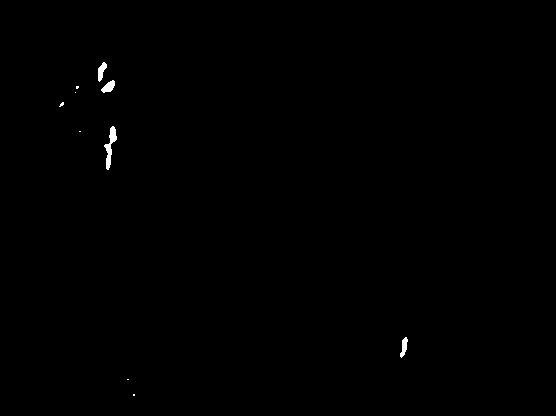

In [118]:
# b. Verde: Filtro de mediana, com máscara de tamanho 3.
jupiter_hsi_verde_mediana = cv2.medianBlur(jupiter_hsi_verde, 3)
cv2_imshow(jupiter_hsi_verde_mediana)

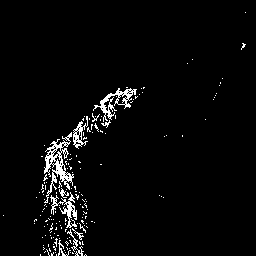

In [148]:
# c. Azul: Filtro para detecção de pontos isolados.

mascara = np.zeros((3,3), np.float32)
mascara[1,1] = 1

res_azul = cv2.filter2D(lena_hsi_azul, -1, mascara)

cv2_imshow(res_azul)

# 7. Escolha uma imagem e apresente-a em formato de filtro Bayer. Apresente os códigos e a imagem.


# 8. Faça a interpolação e restaure a imagem do exercício 7. Apresente os códigos e a imagem.


# 9. O que significa imagens 4:4:4, 4:2:2, 4:2:0? Pesquise a respeito e mostre exemplos. 